# 2.2 task d)

All follow the eigenvector with biggest eigvalue, because matrix to the power of 100 lets all the other approach 0, while this one stays constant

In [12]:
# After 100 steps
from tools import simulate, inital_state_delta, inital_state_random ,generate_matrix_simple, inital_state_task_f
import matplotlib.pyplot as plt
import numpy as np

# nicer looking default plots (according to your github)
plt.style.use('bmh')

In [13]:
# Parameter
nodes = 21
starting_x = 10
connections = [-2,-1,1,2]
steps = 100

In [14]:
# generate matrix
t_matrix = generate_matrix_simple(nodes,connections)

In [15]:
# generate inital states
inital_states = {
"delta": inital_state_delta(nodes,delta_x=starting_x),
"random": inital_state_random(nodes),
"task_f": inital_state_task_f(nodes),
}

In [16]:
# run simulation
time_devs = {}

for name, inital_state in inital_states.items():
    time_devs[name] = simulate(t_matrix,inital_state,steps)

In [25]:
def plot(time_development,filename,index=[0,5,10,20,50,100]):
    x = list(range(nodes))
    plt.figure(figsize=(5,4))
    norm = np.sum(time_development[0])
    for i in index:
        plt.scatter(x,time_development[i]/norm*100,label=f"{i}. step",alpha=0.7)

    plt.xlabel("Node $i$")
    plt.ylabel("$V_i/V_{total} $ in %")
    plt.axhline(100/21,label="$V_i= 1/21$",color="grey",alpha=0.5)
    plt.legend()
    plt.savefig(f"images/{filename}.pdf")

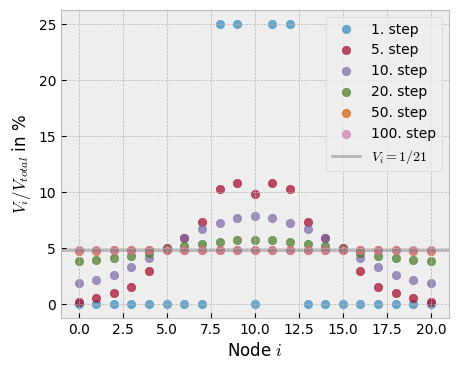

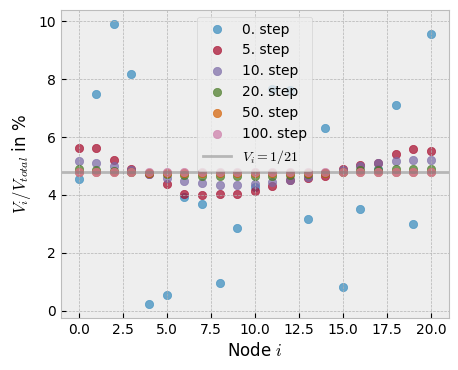

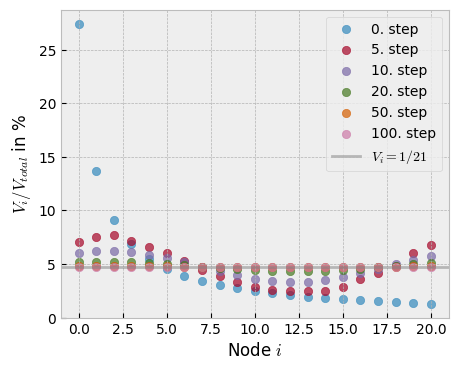

In [26]:

for name, time_dev in time_devs.items():
    index=[0,5,10,20,50,100]
    if name == "delta":
        index[0]=1
    plot(
        time_dev,
        filename=f"time_evo_{name}",
        index = index,
        )